In [66]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## This Dataset was taken from Austin's City Data Website

In [32]:
rest = pd.read_csv('Restaurant_Inspection_Scores.csv')

In [33]:
rest.columns

Index([u'Restaurant Name', u'Zip Code', u'Inspection Date', u'Score',
       u'Address', u'Facility ID', u'Process Description'],
      dtype='object')

## I can see that I need to clean my data. The Address column is the most obvious.

In [7]:
rest

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
0,Sandy's,78704,8/2/2016,88,"603 BARTON SPRINGS RD\nAUSTIN, TX 78704\n(30.2...",2800646,Routine Inspection
1,Scores Men's Club (aka Hot Bodies),78744,1/6/2016,100,"4134 FELTER LN\nAUSTIN, TX 78744\n(30.196537, ...",2803270,Routine Inspection
2,Short N Sweet,78753,5/14/2015,90,"10901 N LAMAR BLVD Unit 104\nAUSTIN, TX 78753\...",10000697,Routine Inspection
3,"Silo on 7th, The",78702,2/28/2017,85,"1300 E 7TH ST\nAUSTIN, TX 78702\n(30.264854, -...",11081788,Routine Inspection
4,"Sahara,The",78721,7/18/2016,94,"1413 WEBBERVILLE RD\nAUSTIN, TX 78721\n(30.279...",10594068,Routine Inspection
5,Schlotzsky's,78757,12/2/2014,87,"2545 W ANDERSON LN\nAUSTIN, TX 78757\n(30.3566...",10004367,Routine Inspection
6,Shanghai Chinese Restaurant,78752,11/30/2016,84,"6718 MIDDLE FISKVILLE RD\nAUSTIN, TX 78752\n(3...",11458502,Routine Inspection
7,Sigma Alpha Epsilon,78705,11/28/2016,95,"2414 PEARL ST\nAUSTIN, TX 78705\n(30.289053, -...",2800581,Routine Inspection
8,Seton Medical Center-Cafeteria,78705,10/15/2015,92,"1201 W 38TH ST\nAUSTIN, TX 78705\n(30.306168, ...",2800304,Routine Inspection
9,Shakespeare's Pub,78701,5/28/2015,77,"314 E 6TH ST\nAUSTIN, TX 78701\n(30.267216, -9...",2801169,Routine Inspection


### But I also want to segment the 'Inspection Date' column into Month and Year. I don't think day of month will be very telling.

In [35]:
rest['Year']=[d.split('/')[2] for d in rest['Inspection Date']]
rest['Month'] = [d.split('/')[0] for d in rest['Inspection Date']]

In [36]:
### Here I map my month column into the corresponding text.

In [37]:
months = {
    '1': 'January',
    '2': 'February',
    '3': 'March',
    '4': 'April',
    '5': 'May',
    '6': 'June',
    '7': 'July',
    '8': 'August',
    '9': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'
}
rest['Month'] = rest['Month'].map(months)

### Then I create a City and Coordinate column from the messy address column

In [47]:
rest['City'] = [a.split('\n')[1] for a in rest['Address']]
rest['Coordinates'] = [a.split('\n')[2] for a in rest['Address']]
rest['Address'] = [a.split('\n')[0] for a in rest['Address']]
rest['City'] = [a.split(',')[0] for a in rest['City']]
rest['Inspection Date'] = pd.to_datetime(rest['Inspection Date'])

IndexError: list index out of range

In [48]:
rest['Zip Code']= rest['Zip Code'].replace('Hwy 290 E\nAustin TX  78723', '78723')
rest['Zip Code'] = rest['Zip Code'].replace('6\nAustin, TX  78741', '78741')

### I change my 'Facility ID' into strings. I don't want to do any accidental calculations on this column

In [13]:
rest['Facility ID'] = rest['Facility ID'].apply(str)

### How many different types of Inspections are there?

In [12]:
rest['Process Description'].value_counts()

Routine Inspection                        24892
1st Follow Up to Routine of 50 - 69         181
2nd Follow Up to 50 - 69                      6
1st Follow Up to Routine of 49 or less        3
Name: Process Description, dtype: int64

## The majority of Inspections were Routine Inspections. Ideally you don't want to eat at a place that has a very high percentage of Follow-up Inspections

In [49]:
rest.loc[rest['Restaurant Name'] == 'Salvation Pizza']

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,Year,Month,City,Coordinates
17,Salvation Pizza,78705,2014-08-29,81,624 W 34TH ST,10934440,1st Follow Up to Routine of 50 - 69,2014,August,AUSTIN,"(30.300794, -97.740681)"
36,Salvation Pizza,78705,2016-07-05,63,624 W 34TH ST,10934440,Routine Inspection,2016,July,AUSTIN,"(30.300794, -97.740681)"
391,Salvation Pizza,78705,2017-02-09,83,624 W 34TH ST,10934440,Routine Inspection,2017,February,AUSTIN,"(30.300794, -97.740681)"
411,Salvation Pizza,78758,2017-02-24,79,11501 ROCK ROSE AVE,11568448,Routine Inspection,2017,February,AUSTIN,"(30.401102, -97.722763)"
417,Salvation Pizza,78705,2014-07-27,65,624 W 34TH ST,10934440,Routine Inspection,2014,July,AUSTIN,"(30.300794, -97.740681)"
506,Salvation Pizza,78705,2016-07-18,91,624 W 34TH ST,10934440,1st Follow Up to Routine of 50 - 69,2016,July,AUSTIN,"(30.300794, -97.740681)"
24814,Salvation Pizza,78705,2015-03-11,90,624 W 34TH ST,10934440,Routine Inspection,2015,March,AUSTIN,"(30.300794, -97.740681)"
24848,Salvation Pizza,78705,2016-01-20,83,624 W 34TH ST,10934440,Routine Inspection,2016,January,AUSTIN,"(30.300794, -97.740681)"
24959,Salvation Pizza,78705,2015-07-07,88,624 W 34TH ST,10934440,Routine Inspection,2015,July,AUSTIN,"(30.300794, -97.740681)"


In [14]:
rest['Inspection Date'].sort_values(ascending=False)

16767   2017-03-10
3203    2017-03-10
10305   2017-03-10
8565    2017-03-10
17669   2017-03-10
22616   2017-03-10
20423   2017-03-10
2488    2017-03-10
23206   2017-03-10
22823   2017-03-10
13146   2017-03-10
1781    2017-03-10
24637   2017-03-10
18403   2017-03-10
23603   2017-03-10
22825   2017-03-10
3264    2017-03-10
14729   2017-03-10
15769   2017-03-10
661     2017-03-10
23754   2017-03-10
18414   2017-03-10
24520   2017-03-10
4228    2017-03-10
16439   2017-03-10
19323   2017-03-10
19306   2017-03-10
2019    2017-03-10
10068   2017-03-10
15022   2017-03-10
           ...    
19325   2014-04-01
11159   2014-04-01
21191   2014-04-01
3116    2014-04-01
24585   2014-04-01
20077   2014-04-01
11951   2014-03-31
7905    2014-03-31
4503    2014-03-31
4012    2014-03-31
4405    2014-03-31
23112   2014-03-31
5594    2014-03-31
8019    2014-03-31
14805   2014-03-31
7818    2014-03-31
6861    2014-03-31
9858    2014-03-31
6867    2014-03-31
1443    2014-03-31
22977   2014-03-31
15209   2014

### You can clearly see the Top 5 are into double digits. I'd stay away from these places. 

In [131]:
rest['Facility ID'].groupby(rest['Restaurant Name']).value_counts().sort_values(ascending=False)

Restaurant Name                            Facility ID
Ken's Donuts                               2800639        12
Crawfish Shack and Oyster Bar              10037846       12
Curras Grill                               2800774        12
Hit The Spot Cafe                          10357550       10
Palazio                                    2800807        10
Pho Thaison                                10424727        9
Viva Meat Market                           10769105        9
Randall's # 2987 Starbucks Kiosk           10720294        9
Star of India Rest.&Bar                    2800900         9
Bread Basket - Chevron                     10174940        9
Randall's # 2987 Deli                      10720284        9
7-Eleven Convenience Store #34251          10394056        8
Super Moreliana-Taqueria                   10726921        8
Randall's # 2987 Meat / Seafood            10720286        8
Randall's # 2987 Produce                   10720292        8
Thundercloud Subs             

### Gross. Ken's Donuts has had some trouble

In [77]:
kens = rest.loc[rest['Restaurant Name'] == 'Ken\'s Donuts'].sort_values('Inspection Date')

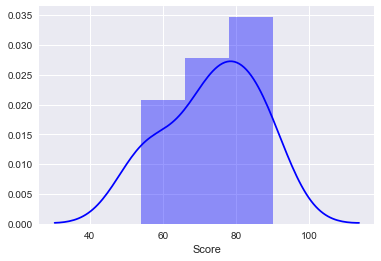

In [76]:
sns.distplot(kens.Score, color='b')

In [62]:
rest.loc[rest['Restaurant Name'] == 'Ken\'s Donuts'].sort_values('Inspection Date')

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,Year,Month,City,Coordinates
19022,Ken's Donuts,78705,2014-07-22,86,2820 GUADALUPE ST,2800639,Routine Inspection,2014,July,AUSTIN,"(30.295043, -97.742698)"
18998,Ken's Donuts,78705,2014-12-16,70,2820 GUADALUPE ST,2800639,Routine Inspection,2014,December,AUSTIN,"(30.295043, -97.742698)"
19257,Ken's Donuts,78705,2014-12-31,86,2820 GUADALUPE ST,2800639,Routine Inspection,2014,December,AUSTIN,"(30.295043, -97.742698)"
19311,Ken's Donuts,78705,2015-05-28,90,2820 GUADALUPE ST,2800639,Routine Inspection,2015,May,AUSTIN,"(30.295043, -97.742698)"
19182,Ken's Donuts,78705,2015-11-25,59,2820 GUADALUPE ST,2800639,Routine Inspection,2015,November,AUSTIN,"(30.295043, -97.742698)"
19074,Ken's Donuts,78705,2015-12-10,54,2820 GUADALUPE ST,2800639,1st Follow Up to Routine of 50 - 69,2015,December,AUSTIN,"(30.295043, -97.742698)"
19319,Ken's Donuts,78705,2015-12-22,83,2820 GUADALUPE ST,2800639,2nd Follow Up to 50 - 69,2015,December,AUSTIN,"(30.295043, -97.742698)"
19310,Ken's Donuts,78705,2016-03-08,54,2820 GUADALUPE ST,2800639,Routine Inspection,2016,March,AUSTIN,"(30.295043, -97.742698)"
19296,Ken's Donuts,78705,2016-03-10,79,2820 GUADALUPE ST,2800639,1st Follow Up to Routine of 50 - 69,2016,March,AUSTIN,"(30.295043, -97.742698)"
19342,Ken's Donuts,78705,2016-05-11,74,2820 GUADALUPE ST,2800639,Routine Inspection,2016,May,AUSTIN,"(30.295043, -97.742698)"


### I think I'll pass on the Crawfish and Oyster

In [ ]:
craw = rest.loc[rest['Restaurant Name'] == 'Crawfish Shack and Oyster Bar'].sort_values('Inspection Date')

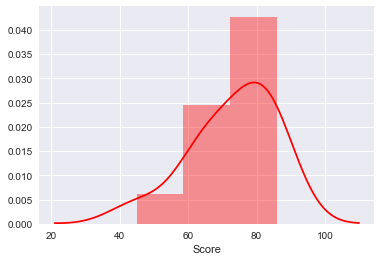

In [78]:
sns.distplot(craw.Score, color='r')

In [70]:
rest.loc[rest['Restaurant Name'] == 'Crawfish Shack and Oyster Bar'].sort_values('Inspection Date')

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,Year,Month,City,Coordinates
5440,Crawfish Shack and Oyster Bar,78728,2014-06-05,65,2013 W WELLS BRANCH PKWY,10037846,Routine Inspection,2014,June,AUSTIN,
5442,Crawfish Shack and Oyster Bar,78728,2014-06-19,86,2013 W WELLS BRANCH PKWY,10037846,1st Follow Up to Routine of 50 - 69,2014,June,AUSTIN,
5448,Crawfish Shack and Oyster Bar,78728,2014-12-05,85,2013 W WELLS BRANCH PKWY,10037846,Routine Inspection,2014,December,AUSTIN,
5439,Crawfish Shack and Oyster Bar,78728,2015-03-26,83,2013 W WELLS BRANCH PKWY,10037846,Routine Inspection,2015,March,AUSTIN,
5445,Crawfish Shack and Oyster Bar,78728,2015-10-08,61,2013 W WELLS BRANCH PKWY,10037846,Routine Inspection,2015,October,AUSTIN,
5446,Crawfish Shack and Oyster Bar,78728,2015-10-26,64,2013 W WELLS BRANCH PKWY,10037846,1st Follow Up to Routine of 50 - 69,2015,October,AUSTIN,
5447,Crawfish Shack and Oyster Bar,78728,2015-11-05,78,2013 W WELLS BRANCH PKWY,10037846,2nd Follow Up to 50 - 69,2015,November,AUSTIN,
5437,Crawfish Shack and Oyster Bar,78728,2016-01-04,80,2013 W WELLS BRANCH PKWY,10037846,Routine Inspection,2016,January,AUSTIN,
5441,Crawfish Shack and Oyster Bar,78728,2016-06-16,45,2013 W WELLS BRANCH PKWY,10037846,Routine Inspection,2016,June,AUSTIN,
5443,Crawfish Shack and Oyster Bar,78728,2016-07-22,74,2013 W WELLS BRANCH PKWY,10037846,Routine Inspection,2016,July,AUSTIN,


### Curras Grill isn't doing so hot either

In [ ]:
curras = rest.loc[rest['Restaurant Name'] == 'Curras Grill'].sort_values('Inspection Date')

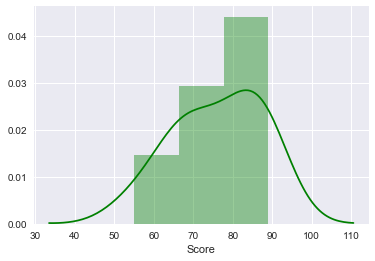

In [79]:
sns.distplot(curras.Score, color='green')

In [73]:
rest.loc[rest['Restaurant Name'] == 'Curras Grill'].sort_values('Inspection Date')

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,Year,Month,City,Coordinates
13723,Curras Grill,78704,2014-06-13,84,614 E OLTORF ST,2800774,Routine Inspection,2014,June,AUSTIN,"(30.236826, -97.749528)"
13781,Curras Grill,78704,2015-01-14,70,614 E OLTORF ST,2800774,Routine Inspection,2015,January,AUSTIN,"(30.236826, -97.749528)"
13566,Curras Grill,78704,2015-07-08,68,614 E OLTORF ST,2800774,Routine Inspection,2015,July,AUSTIN,"(30.236826, -97.749528)"
14252,Curras Grill,78704,2015-07-22,77,614 E OLTORF ST,2800774,1st Follow Up to Routine of 50 - 69,2015,July,AUSTIN,"(30.236826, -97.749528)"
14341,Curras Grill,78704,2016-04-19,55,614 E OLTORF ST,2800774,Routine Inspection,2016,April,AUSTIN,"(30.236826, -97.749528)"
14299,Curras Grill,78704,2016-05-04,78,614 E OLTORF ST,2800774,1st Follow Up to Routine of 50 - 69,2016,May,AUSTIN,"(30.236826, -97.749528)"
14301,Curras Grill,78704,2016-07-14,64,614 E OLTORF ST,2800774,Routine Inspection,2016,July,AUSTIN,"(30.236826, -97.749528)"
13827,Curras Grill,78704,2016-07-18,67,614 E OLTORF ST,2800774,1st Follow Up to Routine of 50 - 69,2016,July,AUSTIN,"(30.236826, -97.749528)"
13575,Curras Grill,78704,2016-08-03,89,614 E OLTORF ST,2800774,2nd Follow Up to 50 - 69,2016,August,AUSTIN,"(30.236826, -97.749528)"
13589,Curras Grill,78704,2016-10-05,86,614 E OLTORF ST,2800774,Routine Inspection,2016,October,AUSTIN,"(30.236826, -97.749528)"


### This Data was cleaned for the purposes of my UX/UI friends

In [53]:
restaurant_zip_avg = rest['Score'].groupby(rest['Zip Code']).mean()

#### At first they only requested that I give them the average scores for every zipcode. All-time

In [54]:
restaurant_zip_max_min_avg = pd.DataFrame(restaurant_zip_avg)
restaurant_zip_max_min_avg.head()

,Score
Zip Code,
78613,91.552632
78615,91.666667
78617,91.200000
78620,94.863636
78641,96.148148


#### Then I figured if they want the Avg, they probably want the Median, Mode, Max and Min for each Zip. If I were doing analysis, I'd want all these numbers. 

In [55]:
from scipy.stats.mstats import mode
f = lambda x: mode(x, axis=None)[0]

In [56]:
restaurant_zip_max_min_avg['Max'] = rest['Score'].groupby(rest['Zip Code']).max()
restaurant_zip_max_min_avg['Min'] = rest['Score'].groupby(rest['Zip Code']).min()
restaurant_zip_max_min_avg['Median'] = rest['Score'].groupby(rest['Zip Code']).median().astype(int)
restaurant_zip_max_min_avg['Mode'] = rest['Score'].groupby(rest['Zip Code']).apply(f).astype(int)
restaurant_zip_max_min_avg['Inspections'] = rest['Zip Code'].value_counts()

In [57]:
restaurant_zip_max_min_avg['Mode'] = restaurant_zip_max_min_avg['Mode'].replace(']','').replace('[','')

### Once I finished the Dataframe, I looked it up and down before exporting as csv

In [58]:
restaurant_zip_max_min_avg

,Score,Max,Min,Median,Mode,Inspections
Zip Code,,,,,,
78613,91.552632,100,71,93,100,228
78615,91.666667,97,86,92,86,6
78617,91.200000,100,59,94,100,265
78620,94.863636,100,84,97,100,22
78641,96.148148,100,84,98,100,27
78652,95.857143,100,85,97,100,56
78653,94.311526,100,68,96,100,321
78654,92.285714,100,73,94,94,7
78660,93.226913,100,63,95,100,379


# Now you can have the csv, too!

In [128]:
restaurant_zip_max_min_avg.to_csv('restaurant_zip_max_min_avg_median_mode.csv')